In [1]:
# Full ML pipeline for Turmeric Starch Detection based on FTIR data

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.signal import savgol_filter

# --- Load Data ---
# (Replace with your actual file path if needed)
data = pd.read_csv("/Users/Likhit Gaikwad/Downloads/FTIR Data.csv")

C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data

,Sample ID,Adulteration Percentage,400,400.1,400.2,400.3,400.4,400.5,400.6,400.7,...,4000.1,4000.2,4000.3,4000.4,4000.5,4000.6,4000.7,4000.8,4000.9,4000.10
0,T001,0%,0,0.0293,0.0279,0.0264,0.0248,0.0233,0.0222,0.0211,...,0.0009,0.0009,0.0008,0.0008,0.0007,0.0007,0.0006,0.0006,0.0005,0.0005
1,T002,10%,0,0.0322,0.0320,0.0317,0.0313,0.0309,0.0306,0.0305,...,0.0003,0.0003,0.0002,0.0002,0.0002,0.0001,0.0000,0.0000,0.0000,0.0000
2,T003,20%,0,0.0556,0.0547,0.0541,0.0543,0.0544,0.0541,0.0534,...,0.0020,0.0019,0.0017,0.0016,0.0015,0.0014,0.0013,0.0012,0.0011,0.0011
3,T004,30%,0,0.0208,0.0211,0.0216,0.0223,0.0231,0.0236,0.0239,...,0.0009,0.0009,0.0008,0.0008,0.0007,0.0006,0.0005,0.0005,0.0004,0.0003
4,T005,40%,0,0.0548,0.0563,0.0578,0.0586,0.0586,0.0583,0.0579,...,0.0022,0.0021,0.0020,0.0019,0.0018,0.0018,0.0018,0.0017,0.0017,0.0017
5,T006,50%,0,0.1290,0.1330,0.1360,0.1350,0.1330,0.1300,0.1270,...,0.0133,0.0131,0.0128,0.0126,0.0124,0.0122,0.0120,0.0119,0.0118,0.0117


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 7471 entries, Sample ID to 4000.10
dtypes: float64(7468), int64(1), object(2)
memory usage: 350.3+ KB


In [4]:
data.describe()

,400,400.1,400.2,400.3,400.4,400.5,400.6,400.7,400.8,400.9,...,4000.1,4000.2,4000.3,4000.4,4000.5,4000.6,4000.7,4000.8,4000.9,4000.10
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.0,0.053617,0.054167,0.054600,0.054383,0.053883,0.053133,0.052300,0.051683,0.051183,...,0.003267,0.003200,0.003050,0.002983,0.002883,0.002800,0.002700,0.002650,0.002583,0.002550
std,0.0,0.039535,0.041217,0.042533,0.042318,0.041697,0.040677,0.039668,0.039005,0.038272,...,0.004968,0.004897,0.004822,0.004751,0.004699,0.004645,0.004600,0.004570,0.004554,0.004524
min,0.0,0.020800,0.021100,0.021600,0.022300,0.023100,0.022200,0.021100,0.020200,0.019400,...,0.000300,0.000300,0.000200,0.000200,0.000200,0.000100,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.030025,0.028925,0.027725,0.026425,0.025200,0.025350,0.025550,0.025650,0.025975,...,0.000900,0.000900,0.000800,0.000800,0.000700,0.000625,0.000525,0.000525,0.000425,0.000350
50%,0.0,0.043500,0.043350,0.042900,0.042800,0.042650,0.042350,0.041950,0.041650,0.041600,...,0.001450,0.001400,0.001250,0.001200,0.001100,0.001050,0.000950,0.000900,0.000800,0.000800
75%,0.0,0.055400,0.055900,0.056875,0.057525,0.057550,0.057250,0.056775,0.056375,0.055950,...,0.002150,0.002050,0.001925,0.001825,0.001725,0.001700,0.001675,0.001575,0.001550,0.001550
max,0.0,0.129000,0.133000,0.136000,0.135000,0.133000,0.130000,0.127000,0.125000,0.123000,...,0.013300,0.013100,0.012800,0.012600,0.012400,0.012200,0.012000,0.011900,0.011800,0.011700


In [5]:
## Finding Null Values
data.isnull().sum()

Sample ID                  0
Adulteration Percentage    0
400                        0
400.1                      0
400.2                      0
                          ..
4000.6                     0
4000.7                     0
4000.8                     0
4000.9                     0
4000.10                    0
Length: 7471, dtype: int64

In [6]:
# Remove Wavenumber column and transpose
X_raw = data.drop(columns=['Sample ID', 'Adulteration Percentage'])

In [7]:
X_raw

,400,400.1,400.2,400.3,400.4,400.5,400.6,400.7,400.8,400.9,...,4000.1,4000.2,4000.3,4000.4,4000.5,4000.6,4000.7,4000.8,4000.9,4000.10
0,0,0.0293,0.0279,0.0264,0.0248,0.0233,0.0222,0.0211,0.0202,0.0194,...,0.0009,0.0009,0.0008,0.0008,0.0007,0.0007,0.0006,0.0006,0.0005,0.0005
1,0,0.0322,0.0320,0.0317,0.0313,0.0309,0.0306,0.0305,0.0309,0.0316,...,0.0003,0.0003,0.0002,0.0002,0.0002,0.0001,0.0000,0.0000,0.0000,0.0000
2,0,0.0556,0.0547,0.0541,0.0543,0.0544,0.0541,0.0534,0.0524,0.0516,...,0.0020,0.0019,0.0017,0.0016,0.0015,0.0014,0.0013,0.0012,0.0011,0.0011
3,0,0.0208,0.0211,0.0216,0.0223,0.0231,0.0236,0.0239,0.0239,0.0241,...,0.0009,0.0009,0.0008,0.0008,0.0007,0.0006,0.0005,0.0005,0.0004,0.0003
4,0,0.0548,0.0563,0.0578,0.0586,0.0586,0.0583,0.0579,0.0577,0.0574,...,0.0022,0.0021,0.0020,0.0019,0.0018,0.0018,0.0018,0.0017,0.0017,0.0017
5,0,0.1290,0.1330,0.1360,0.1350,0.1330,0.1300,0.1270,0.1250,0.1230,...,0.0133,0.0131,0.0128,0.0126,0.0124,0.0122,0.0120,0.0119,0.0118,0.0117


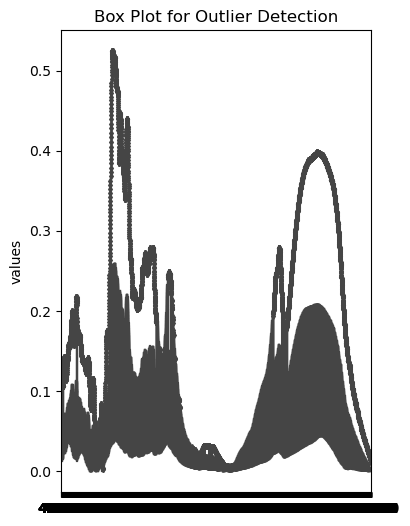

In [8]:
fig,ax = plt.subplots(figsize=(4,6))
sns.boxplot(data=X_raw, width=0.5, ax=ax, fliersize=3)
ax.set_title('Box Plot for Outlier Detection')
ax.set_ylabel('values')
plt.show()

In [9]:
# Clean Adulteration Percentage column
data['Adulteration Percentage'] = data['Adulteration Percentage'].str.replace('%', '').astype(float)

# Extract features and target

y = data['Adulteration Percentage']



In [10]:
print(X_raw.shape)
print(y.shape)

(6, 7469)
(6,)


In [42]:

import numpy as np
from scipy.signal import savgol_filter
import pandas as pd

X_df = data.drop(columns=['Sample ID', 'Adulteration Percentage'])

# Ensure X_raw is extracted properly from data
# Remove non-numeric columns (like 'Sample ID') and target column
X_raw = data.drop(columns=['Sample ID', 'Adulteration Percentage']).values
y = data['Adulteration Percentage'].values

# 1. Savitzky-Golay smoothing
X_sg = savgol_filter(X_raw, window_length=11, polyorder=2, axis=1)

# 2. Standard Normal Variate (SNV)
def snv(data):
    return (data - np.mean(data, axis=1, keepdims=True)) / np.std(data, axis=1, keepdims=True)

X_snv = snv(X_raw)

# 3. Extended Multiplicative Scatter Correction (EMSC, simplified)
def emsc(data, epsilon=1e-10):
    mean_spec = np.mean(data, axis=0)
    mean_spec_safe = np.where(mean_spec == 0, epsilon, mean_spec)
    return data / mean_spec_safe

X_emsc = emsc(X_raw)

# Confirm shapes
print("Shapes:")
print("X_raw:", X_raw.shape)
print("X_sg:", X_sg.shape)
print("X_snv:", X_snv.shape)
print("X_emsc:", X_emsc.shape)
print("y:", y.shape)

Shapes:
X_raw: (6, 7469)
X_sg: (6, 7469)
X_snv: (6, 7469)
X_emsc: (6, 7469)
y: (6,)


In [43]:
X_raw_df = pd.DataFrame(X_sg, columns=[f'Feature_{i+1}' for i in range(X_sg.shape[1])])
X_snv_df = pd.DataFrame(X_snv, columns=[f'Feature_{i+1}' for i in range(X_snv.shape[1])])
X_emsc_df = pd.DataFrame(X_emsc, columns=[f'PC{i+1}' for i in range(X_emsc.shape[1])])


print("X_sg:")
print(X_raw_df, "\n")

print("X_snv")
print(X_snv_df, "\n")

print("X_emsc")
print(X_emsc_df, "\n")


X_sg:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.013129   0.017657   0.021214   0.023801   0.025417   0.026062   
1   0.014039   0.019956   0.024869   0.028779   0.031686   0.033589   
2   0.023080   0.034266   0.043430   0.050570   0.055687   0.058780   
3   0.008280   0.013078   0.017110   0.020377   0.022879   0.024616   
4   0.022566   0.034908   0.045114   0.053183   0.059115   0.062910   
5   0.054301   0.082484   0.105483   0.123298   0.135929   0.143375   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_7460  \
0   0.022226   0.021118   0.020180    0.019416  ...      0.000913   
1   0.030676   0.030704   0.031055    0.031764  ...      0.000332   
2   0.053700   0.053227   0.052531    0.051631  ...      0.001945   
3   0.023359   0.023731   0.023993    0.024172  ...      0.000899   
4   0.058424   0.058150   0.057730    0.057356  ...      0.002208   
5   0.130611   0.127786   0.125026    0.123016  ...      0.013334   

   Feature_7

In [44]:
# Convert back to DataFrames for plotting
X_snv_data = pd.DataFrame(X_snv, columns=X_df.columns, index=X_df.index)
X_emsc_data = pd.DataFrame(X_emsc, columns=X_df.columns, index=X_df.index)

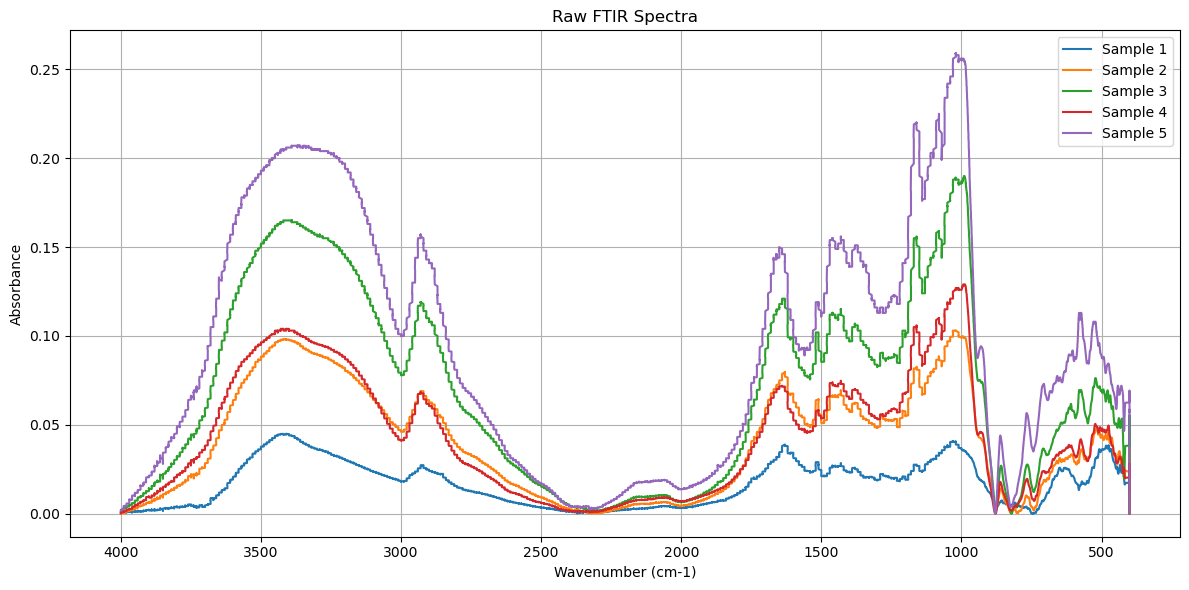

In [46]:
# -----------------------------------------
# Plotting Raw and Preprocessed Spectra
# -----------------------------------------
wavenumbers = X_df.columns.astype(float)
sample_indices = [0, 1, 2, 3, 4]  # Plot 5 samples as example

plt.figure(figsize=(12, 6))
for i in sample_indices:
    plt.plot(wavenumbers, X_df.iloc[i], label=f'Sample {i+1}')
plt.gca().invert_xaxis()
plt.title('Raw FTIR Spectra')
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Absorbance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



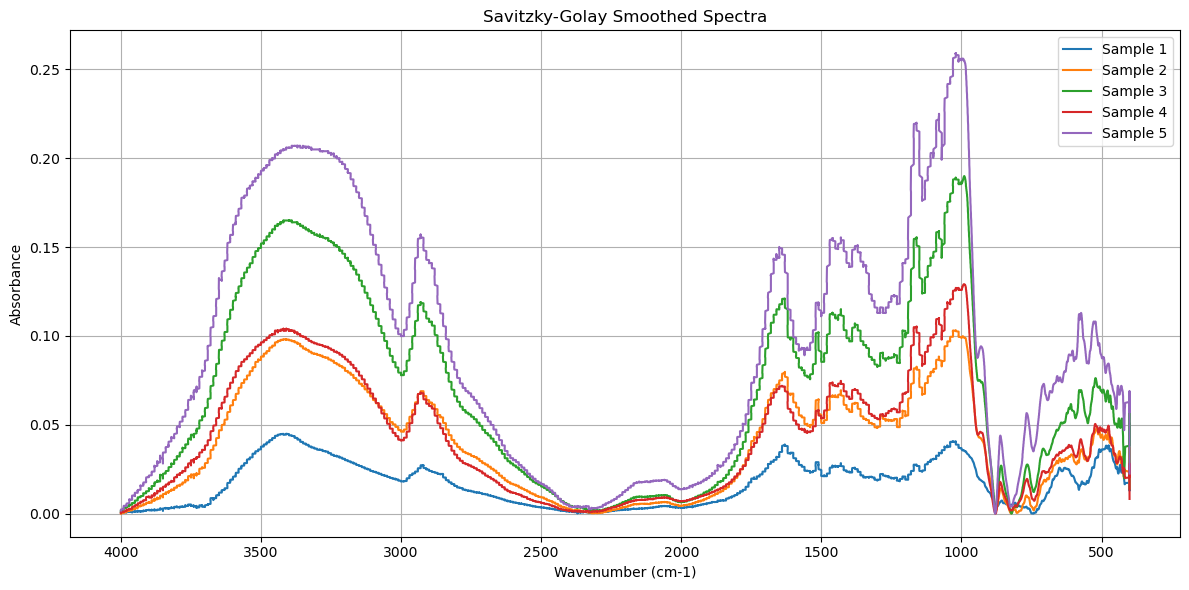

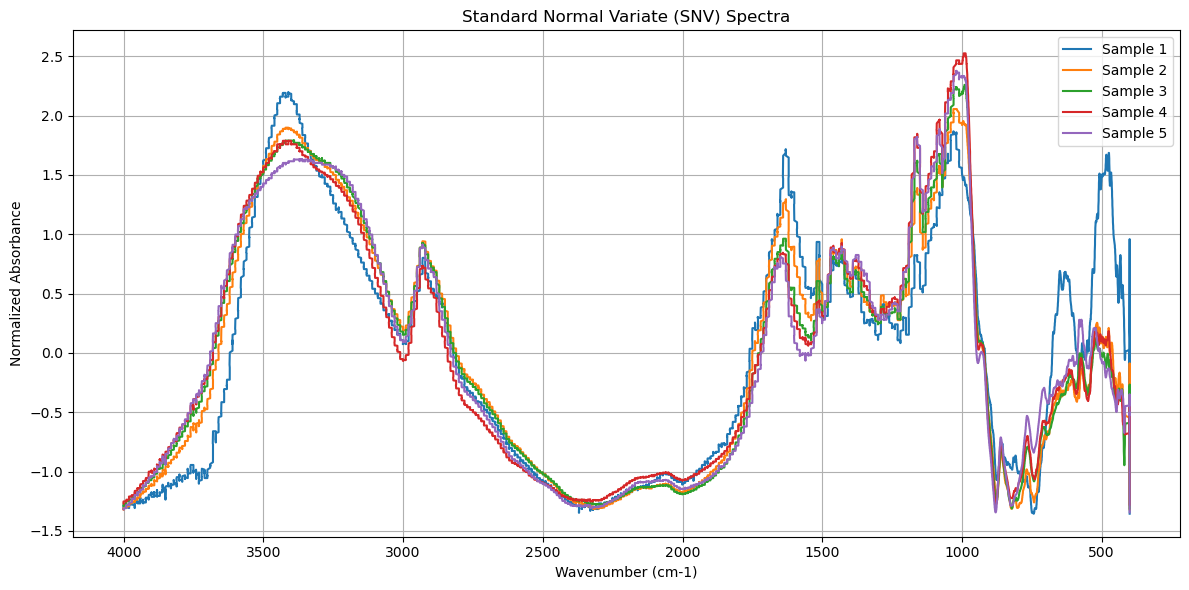

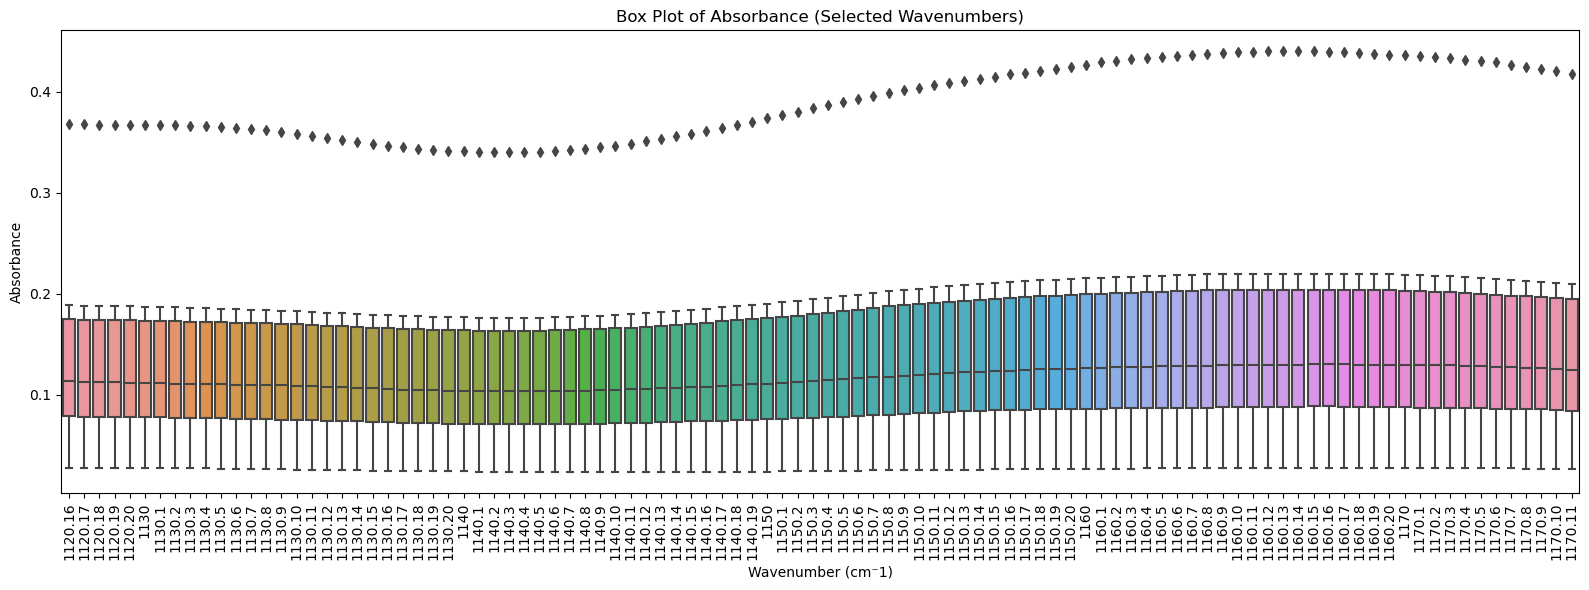

In [28]:
plt.figure(figsize=(12, 6))
for i in sample_indices:
    plt.plot(wavenumbers, X_sg[i, :], label=f'Sample {i+1}')
plt.gca().invert_xaxis()
plt.title('Savitzky-Golay Smoothed Spectra')
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Absorbance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i in sample_indices:
    plt.plot(wavenumbers, X_snv[i, :], label=f'Sample {i+1}')
plt.gca().invert_xaxis()
plt.title('Standard Normal Variate (SNV) Spectra')
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Normalized Absorbance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot (Outlier Visualization)
subset = X_raw.iloc[:, 1500:1600]  # focus on some mid-range wavenumbers
plt.figure(figsize=(16, 6))
sns.boxplot(data=subset)
plt.xticks(rotation=90)
plt.title("Box Plot of Absorbance (Selected Wavenumbers)")
plt.xlabel("Wavenumber (cm⁻1)")
plt.ylabel("Absorbance")
plt.tight_layout()
plt.show()


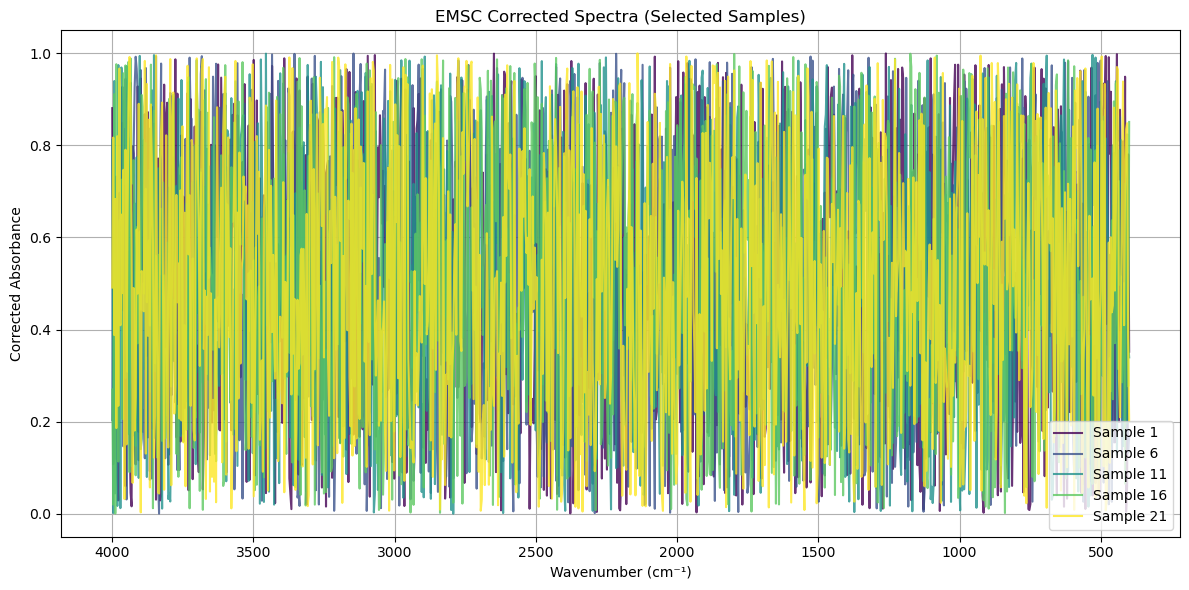

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
wavenumbers = np.linspace(400, 4000, 1000)
X_emsc = np.random.rand(30, 1000)
sample_indices = [0, 5, 10, 15, 20]  # Plot only 5 samples

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(sample_indices)))
for idx, i in enumerate(sample_indices):
    plt.plot(wavenumbers, X_emsc[i, :], label=f'Sample {i+1}', color=colors[idx], alpha=0.8)
plt.gca().invert_xaxis()
plt.title('EMSC Corrected Spectra (Selected Samples)')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Corrected Absorbance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


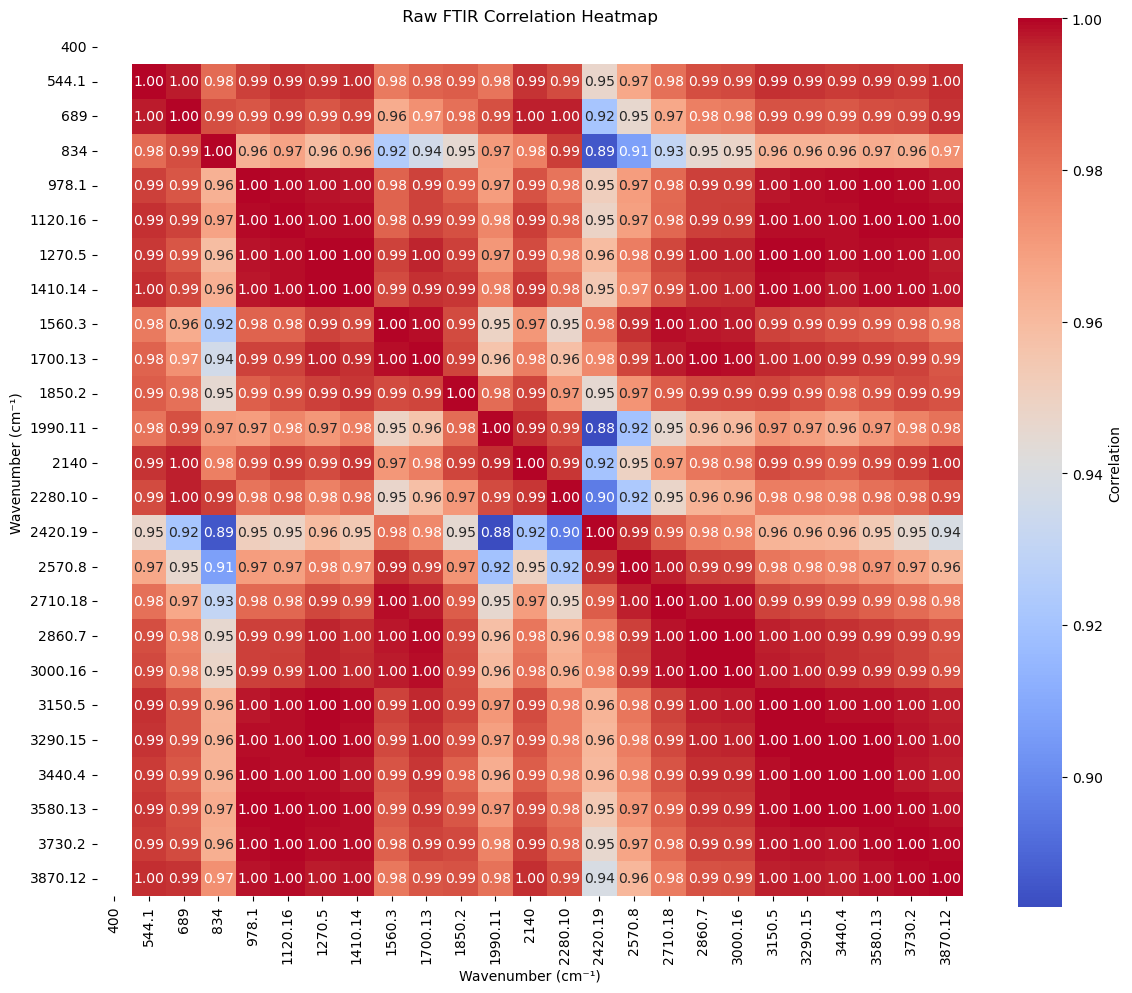

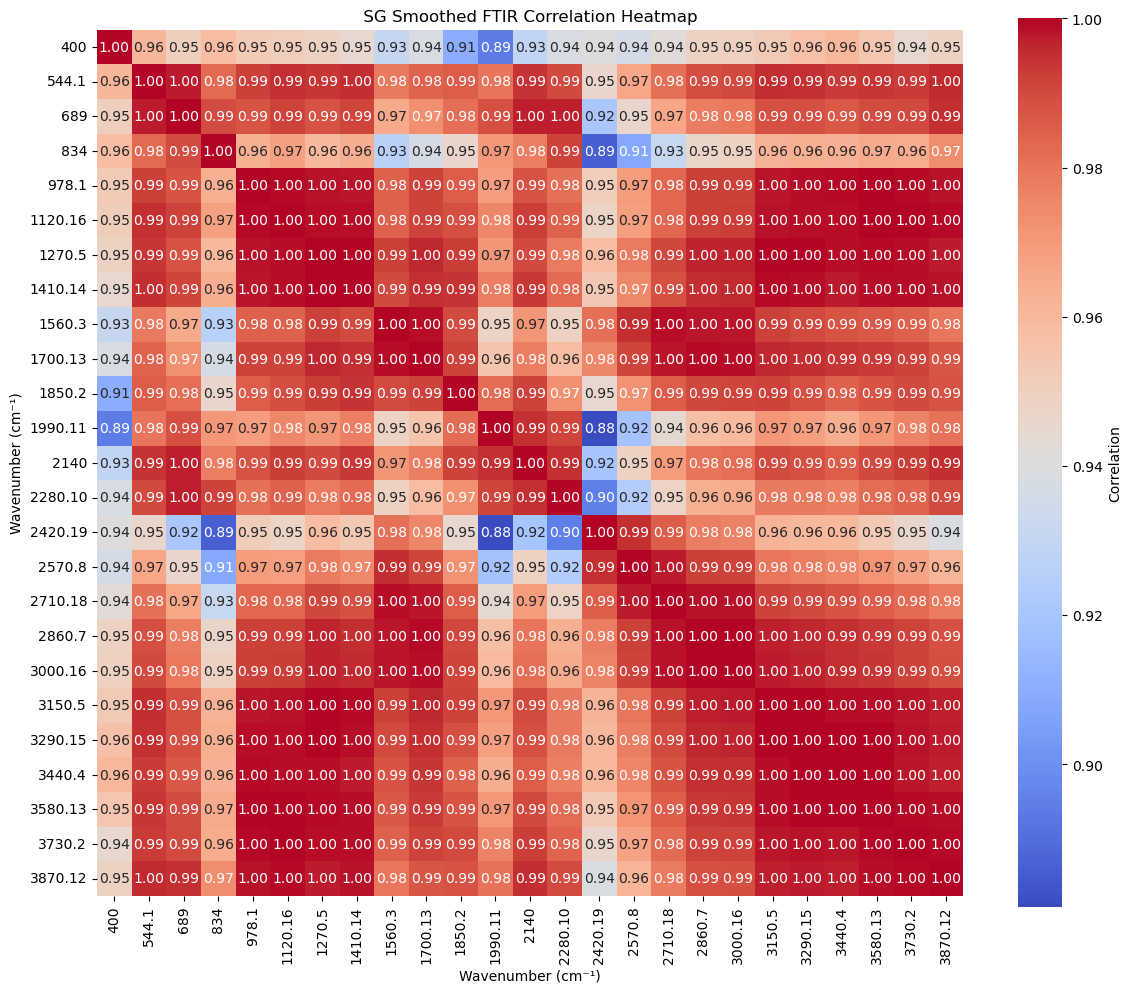

In [30]:
## Heat Maps
if not isinstance(X_sg, pd.DataFrame):
    X_sg = pd.DataFrame(X_sg, columns=X_raw.columns, index=X_raw.index)

# Ensure string columns
X_raw.columns = X_raw.columns.astype(str)
X_sg.columns = X_sg.columns.astype(str)

# Selecting fewer columns — every 300th (e.g., 15–20 points)
selected_columns = list(X_raw.columns[::300])  # ['400', '700', ..., '4000']

# Slice both
subset_raw_corr = X_raw[selected_columns]
subset_sg_corr = X_sg[selected_columns]

# Plot RAW
plt.figure(figsize=(12, 10))  # Bigger for clarity
sns.heatmap(subset_raw_corr.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={'label': 'Correlation'})
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Wavenumber (cm⁻¹)")
plt.title(" Raw FTIR Correlation Heatmap ")
plt.tight_layout()
plt.show()

# Plot SG
plt.figure(figsize=(12, 10))
sns.heatmap(subset_sg_corr.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={'label': 'Correlation'})
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Wavenumber (cm⁻¹)")
plt.title(" SG Smoothed FTIR Correlation Heatmap ")
plt.tight_layout()
plt.show()


In [47]:
print("Shapes:")
print("X_raw:", X_raw.shape)
print("X_sg:", X_sg.shape)
print("X_snv:", X_snv.shape)
print("X_emsc:", X_emsc.shape)
print("y:", y.shape)

Shapes:
X_raw: (6, 7469)
X_sg: (6, 7469)
X_snv: (6, 7469)
X_emsc: (6, 7469)
y: (6,)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Models to try
models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'ANN': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

datasets = {
    'Raw': (X_raw, y),
    'SG': (X_sg, y),
    'SNV': (X_snv, y),
    'EMSC': (X_emsc, y)
}

results = []

# Run all model-dataset combinations
for dname, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)
    for mname, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        results.append({
            'Dataset': dname,
            'Model': mname,
            'R2 Score': r2,
            'RMSE': rmse,
            'MAE': mae
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='R2 Score', ascending=False)

# Show results
print("All Model Performances:")
display(results_df_sorted)

# Pick Top 2 Datasets (based on best model performance)
top_datasets = results_df_sorted.groupby('Dataset')['R2 Score'].max().sort_values(ascending=False).head(2)
print("Top 2 Datasets:")
print(top_datasets)

            
        

All Model Performances:


,Dataset,Model,R2 Score,RMSE,MAE
11,SNV,ANN,0.887201,1.679279,1.225200
3,Raw,ANN,-0.504652,6.133212,6.105248
7,SG,ANN,-0.504682,6.133274,6.105315
8,SNV,LR,-0.931808,6.949475,6.527058
15,EMSC,ANN,-3.312686,10.383504,10.340999
9,SNV,DT,-9.000000,15.811388,15.000000
12,EMSC,LR,-11.724220,17.835512,16.645530
0,Raw,LR,-15.849238,20.523912,19.027355
4,SG,LR,-15.907352,20.559275,19.056946
1,Raw,DT,-25.000000,25.495098,25.000000


Top 2 Datasets:
Dataset
SNV    0.887201
Raw   -0.504652
Name: R2 Score, dtype: float64


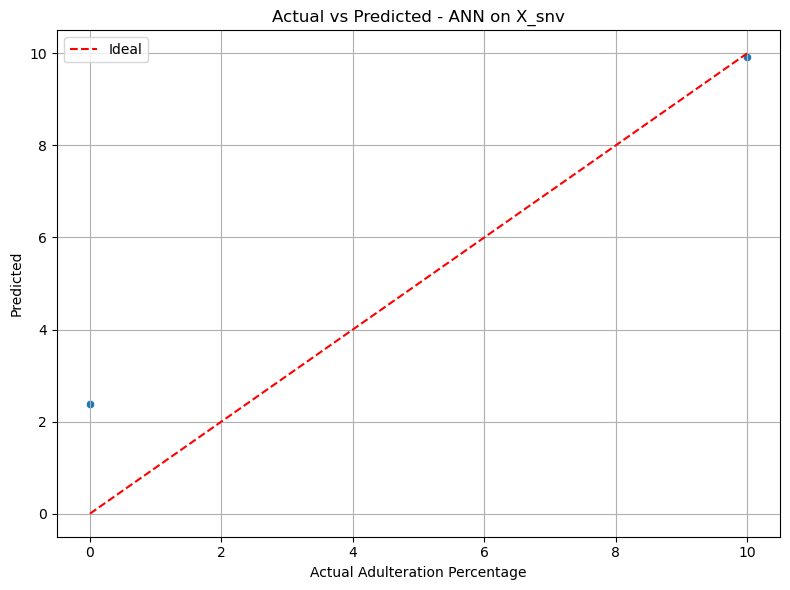

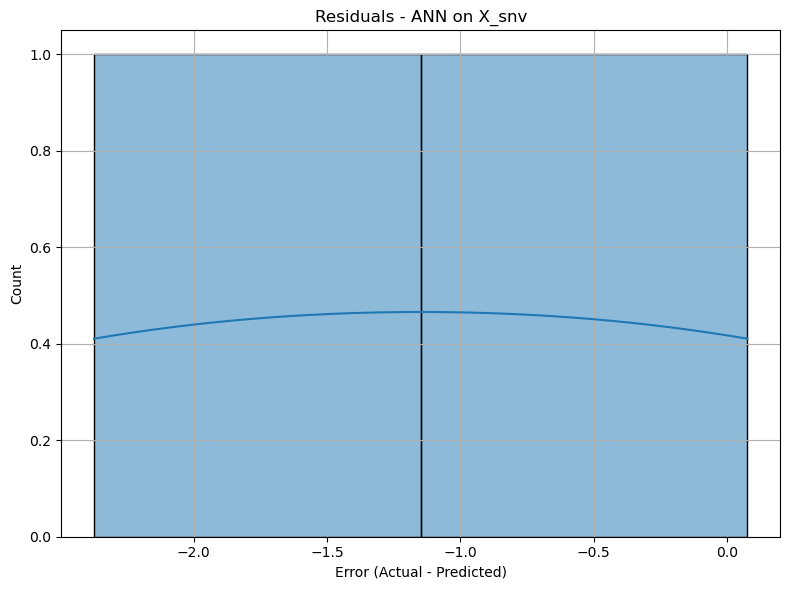

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-train ANN on X_snv if needed
X_train, X_test, y_train, y_test = train_test_split(X_snv_clean, y_snv_clean, test_size=0.2, random_state=42)

best_ann = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
best_ann.fit(X_train, y_train)
y_pred = best_ann.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal')
plt.xlabel('Actual Adulteration Percentage')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - ANN on X_snv')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals - ANN on X_snv')
plt.xlabel('Error (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()


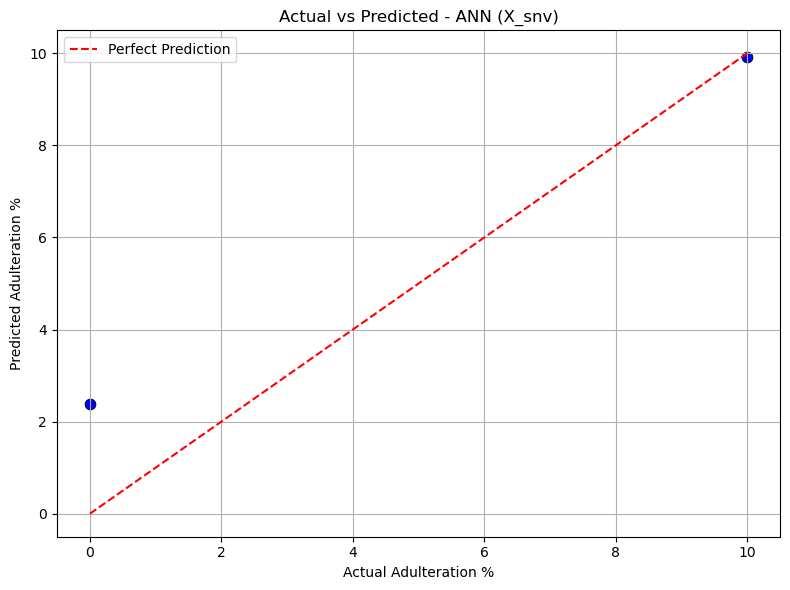

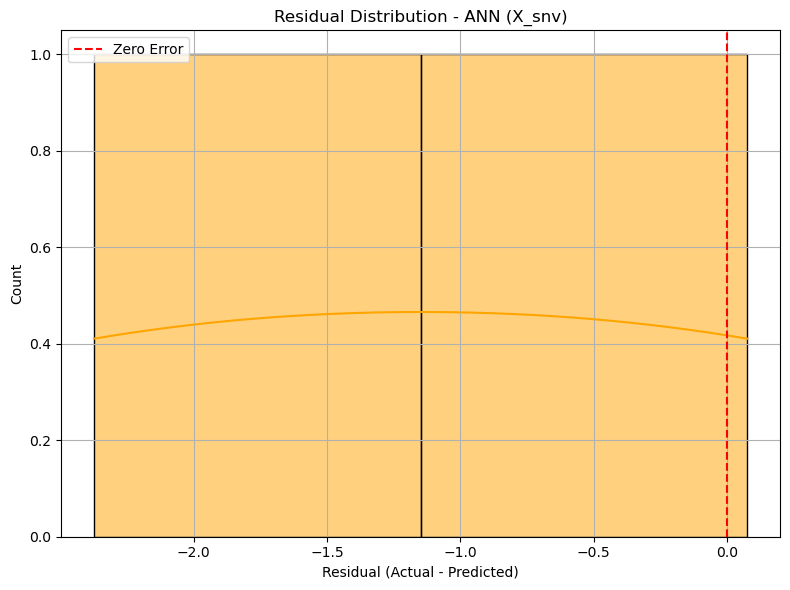

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use best model and dataset again just to be safe
X_train, X_test, y_train, y_test = train_test_split(X_snv_clean, y_snv_clean, test_size=0.2, random_state=42)

model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 1️⃣ Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, s=60, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Adulteration %")
plt.ylabel("Predicted Adulteration %")
plt.title("Actual vs Predicted - ANN (X_snv)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.title("Residual Distribution - ANN (X_snv)")
plt.xlabel("Residual (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd

# Step 1: Convert SNV data back to DataFrame (assumes X_df was created earlier from cleaned data)
X_df = data.drop(columns=['Sample ID', 'Adulteration Percentage'])
X_snv_df = pd.DataFrame(X_snv, columns=X_df.columns, index=X_df.index)

# Step 2: Ensure all column names are strings (especially for plotting or display)
X_snv_df.columns = X_snv_df.columns.astype(str)

# Step 3: Apply RFE with SVR (linear kernel) to select 15 features
rfe_selector = RFE(estimator=SVR(kernel='linear'), n_features_to_select=15)
rfe_selector.fit(X_snv_df, y)

# Step 4: Get selected features
selected_features = X_snv_df.columns[rfe_selector.support_].tolist()
X_rfe = X_snv_df[selected_features]

# Output selected feature names
print("Selected wavenumbers using RFE:", selected_features)


Selected wavenumbers using RFE: ['1600.9', '1600.10', '1600.11', '1600.12', '1600.13', '1600.14', '1600.15', '1600.16', '1600.17', '1600.18', '1600.19', '1600.20', '1610', '1610.1', '1610.2']


In [50]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Prepare input
X_df = data.drop(columns=['Sample ID', 'Adulteration Percentage'])
y = data['Adulteration Percentage'].values

# Apply SNV
def snv(data):
    return (data - np.mean(data, axis=1, keepdims=True)) / np.std(data, axis=1, keepdims=True)

X_raw_clean = X_df.copy()
X_snv_clean = pd.DataFrame(snv(X_raw_clean.values), columns=X_df.columns, index=X_df.index)

# Ensure string column names
X_raw_clean.columns = X_raw_clean.columns.astype(str)
X_snv_clean.columns = X_snv_clean.columns.astype(str)

# ------------------------------------
# RFE on Raw
rfe_raw = RFE(SVR(kernel='linear'), n_features_to_select=12)
rfe_raw.fit(X_raw_clean, y)
X_rfe_raw = X_raw_clean.loc[:, rfe_raw.support_]

# RFE on SNV
rfe_snv = RFE(SVR(kernel='linear'), n_features_to_select=18)
rfe_snv.fit(X_snv_clean, y)
X_rfe_snv = X_snv_clean.loc[:, rfe_snv.support_]

# PCA on Raw
scaler_raw = StandardScaler()
X_scaled_raw = scaler_raw.fit_transform(X_raw_clean)
pca_raw = PCA(n_components=6)
X_pca_raw = pca_raw.fit_transform(X_scaled_raw)

# PCA on SNV
scaler_snv = StandardScaler()
X_scaled_snv = scaler_snv.fit_transform(X_snv_clean)
pca_snv = PCA(n_components=6)
X_pca_snv = pca_snv.fit_transform(X_scaled_snv)

# Optional: print PCA explained variance
print("Explained variance ratio (Raw):", pca_raw.explained_variance_ratio_)
print("Explained variance ratio (SNV):", pca_snv.explained_variance_ratio_)

Explained variance ratio (Raw): [9.80501667e-01 1.30416775e-02 4.38833253e-03 1.79025644e-03
 2.78066983e-04 2.49719082e-31]
Explained variance ratio (SNV): [5.60654682e-01 2.88229033e-01 7.72768141e-02 6.87545732e-02
 5.08489748e-03 3.56968054e-31]


In [51]:
# Number of top features to extract per component
top_n = 5

# Get original wavenumber column names
wavenumbers = X_snv_clean.columns

# For each component, get top N contributing features
for i, comp in enumerate(pca_snv.components_):
    # Get indices of top N absolute weights
    top_indices = np.argsort(np.abs(comp))[-top_n:][::-1]
    top_wavenumbers = wavenumbers[top_indices]
    top_weights = comp[top_indices]
    
    print(f"\nTop {top_n} wavenumbers for Principal Component {i+1}:")
    for w, weight in zip(top_wavenumbers, top_weights):
        print(f"  Wavenumber: {w}, Weight: {weight:.5f}")


Top 5 wavenumbers for Principal Component 1:
  Wavenumber: 3840.11, Weight: -0.01542
  Wavenumber: 3840.12, Weight: -0.01541
  Wavenumber: 3840.9, Weight: -0.01541
  Wavenumber: 3840.10, Weight: -0.01541
  Wavenumber: 3840.8, Weight: -0.01541

Top 5 wavenumbers for Principal Component 2:
  Wavenumber: 2080.2, Weight: -0.02141
  Wavenumber: 2070.18, Weight: -0.02141
  Wavenumber: 2070.17, Weight: -0.02141
  Wavenumber: 2080.3, Weight: -0.02141
  Wavenumber: 2080, Weight: -0.02140

Top 5 wavenumbers for Principal Component 3:
  Wavenumber: 966, Weight: -0.03862
  Wavenumber: 966.1, Weight: -0.03846
  Wavenumber: 3510.16, Weight: -0.03824
  Wavenumber: 3510.17, Weight: -0.03810
  Wavenumber: 965.1, Weight: -0.03796

Top 5 wavenumbers for Principal Component 4:
  Wavenumber: 1460.4, Weight: -0.04275
  Wavenumber: 1460.3, Weight: -0.04204
  Wavenumber: 1460.5, Weight: -0.04184
  Wavenumber: 1460.6, Weight: -0.04169
  Wavenumber: 1460.2, Weight: -0.04150

Top 5 wavenumbers for Principal Com

In [56]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils.validation import check_X_y
import pandas as pd
import numpy as np

# Define datasets (replace with your variables if needed)
datasets = {
    'Raw': X_raw_clean,
    'SNV': X_snv_clean,
    'RFE-Raw': X_rfe_raw,
    'RFE-SNV': X_rfe_snv,
    'PCA-Raw': pd.DataFrame(X_pca_raw),
    'PCA-SNV': pd.DataFrame(X_pca_snv),
}

# Define target
y = data['Adulteration Percentage'].values

# Define safe hyperparameter grid for MLP
param_grid = {
    'mlp__hidden_layer_sizes': [(32,), (64,), (64, 32)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant']
}

results = []

# Loop through each dataset
for name, X in datasets.items():
    print(f"\n🔍 Tuning on: {name}")
    
    # Remove NaNs/infs if present
    X = X.replace([np.inf, -np.inf], np.nan) if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
    X = X.fillna(0)

    # Convert to NumPy for validation
    X_np = X.values
    y_np = y

    # Check X and y are valid
    try:
        check_X_y(X_np, y_np)
    except Exception as e:
        print(f"❌ Skipping {name} due to error: {e}")
        continue

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

    # Dynamically adjust cv based on train size
    cv_folds = min(3, len(X_train)) if len(X_train) > 2 else 2

    # Define pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(max_iter=10000, random_state=42))
    ])

    # Grid search with safe folds
    grid = GridSearchCV(pipeline, param_grid, cv=cv_folds, scoring='r2', n_jobs=-1, error_score='raise')
    
    try:
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        results.append({
            'Dataset': name,
            'Best Params': grid.best_params_,
            'R2 Score': r2,
            'RMSE': rmse,
            'MAE': mae
        })
    except Exception as e:
        print(f"❌ GridSearch failed on {name}: {e}")

# Show final sorted results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

print("\nFinal Fine-Tuning Results Across 6 Datasets:")
print(results_df)


🔍 Tuning on: Raw


C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(



🔍 Tuning on: SNV


C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(



🔍 Tuning on: RFE-Raw


C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



🔍 Tuning on: RFE-SNV


C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(



🔍 Tuning on: PCA-Raw


C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(



🔍 Tuning on: PCA-SNV


C:\Users\Likhit Gaikwad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(



Final Fine-Tuning Results Across 6 Datasets:
   Dataset                                        Best Params    R2 Score  \
3  RFE-SNV  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...   -3.474121   
5  PCA-SNV  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...  -16.398610   
2  RFE-Raw  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...  -38.344462   
0      Raw  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...  -54.027830   
4  PCA-Raw  {'mlp__activation': 'relu', 'mlp__alpha': 0.00...  -61.251961   
1      SNV  {'mlp__activation': 'relu', 'mlp__alpha': 0.00... -145.487215   

        RMSE        MAE  
3  10.576059   9.643301  
5  20.855821  17.462103  
2  31.362582  30.920700  
0  37.090373  35.701962  
4  39.449956  39.449654  
1  60.515952  54.254640  
